<a href="https://colab.research.google.com/github/placeholder2/Heart-Disease-Prediction/blob/main/hd_eda_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Factors Exploratory Data Analysis**


## **Part II : Bivariate analysis and with some multivariete plots** 
\
### **Statistical tools used:**
**Pearson's Correlation**\
**Spearman's Correlation**\
**Mann-Whiney U Test**\
**Chi-Square Test Of Independance**



In [ ]:
from google.colab import drive
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr,mannwhitneyu,spearmanr,chi2_contingency
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Plotting parameters
plt.rcParams.update({
    "xtick.major.size": 5,
    "xtick.major.pad": 20,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 5,
    "lines.linewidth": 2,
    "lines.color": "g",
    "figure.figsize": (14,7),
    'axes.titlesize': 25,
    'axes.titlepad' : 20,
    'figure.autolayout': True,
})
plt.style.use('bmh')

# List of colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/heart_2020_cleaned.csv')

In [ ]:
def plot_line(col1,col2):
  '''Function making line plot of two columns'''

  plot = sns.lineplot(x = col1, y = col2,data = df)
  plot.set_title(f'{col1} vs {col2}')
  plt.show()

## **Relationships between numerical variables.**

### **Pearson's Correlation**




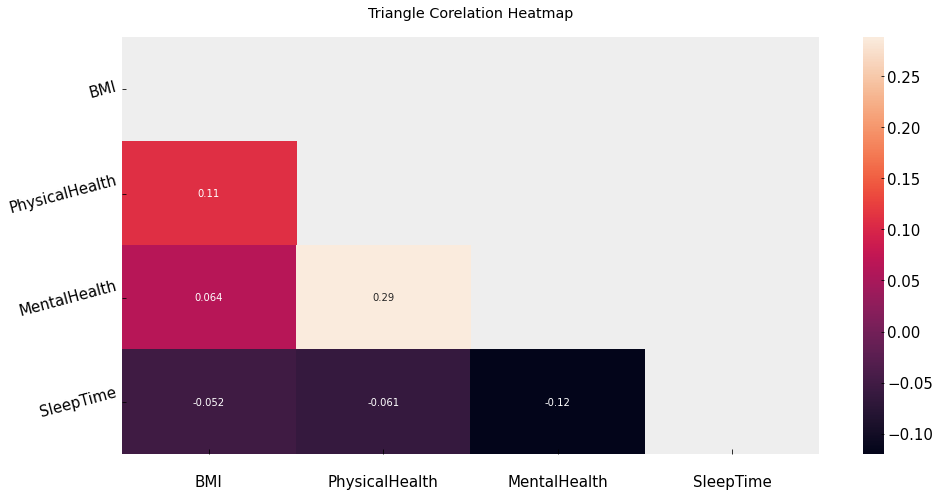

In [ ]:
num_cols = df.select_dtypes(exclude=[object])
mask = np.triu(np.ones_like(num_cols.corr(), dtype=np.bool))
heatmap = sns.heatmap(num_cols.corr(), mask=mask,  annot=True)
heatmap.set_title('Triangle Corelation Heatmap')
heatmap.yaxis.set_tick_params(rotation=15)
plt.show()

Correlations between variables are at most weak, altogh relationship of physical and mental health  gets them close to being moderate. Highest weak correlation outside this one are between sleep time and mental health and between BMI and physical health.

#### **Phisical  and Mental Health**

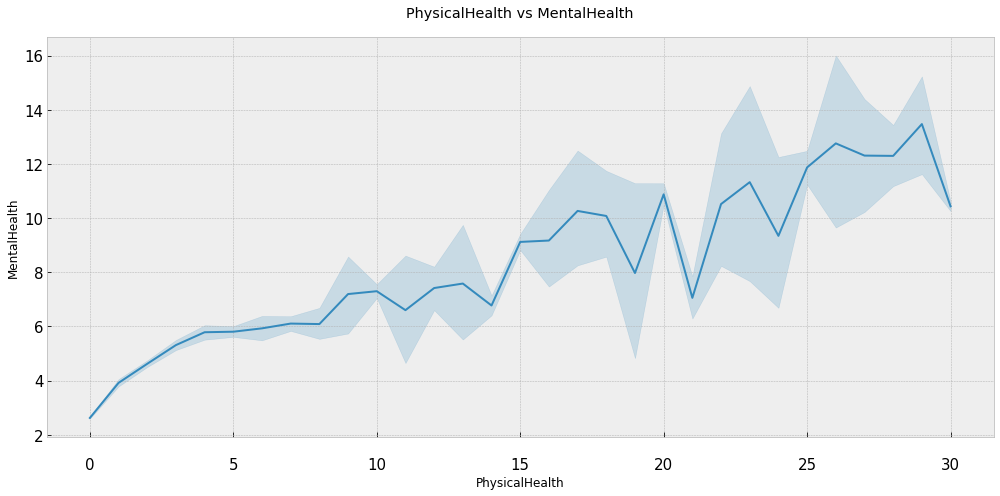

In [ ]:
plot_line('PhysicalHealth','MentalHealth')

In [ ]:
pearsonr( df['MentalHealth'], df['PhysicalHealth'])

(0.2879866740873137, 0.0)

Having more days with not good physical health correposnd to having more days with not good mental health.

#### **Physical Health and BMI**

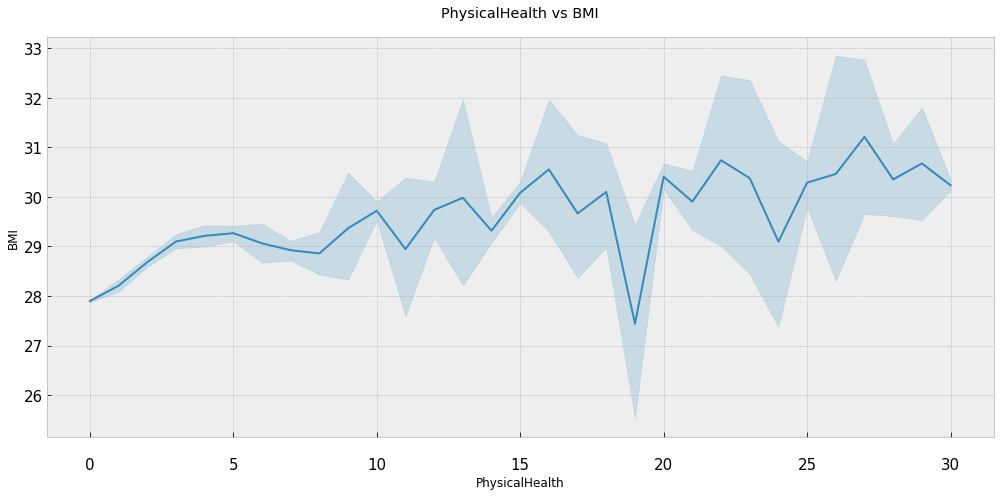

In [ ]:
plot_line('PhysicalHealth','BMI')

In [ ]:
pearsonr( df['BMI'], df['PhysicalHealth'])

(0.10978754360968204, 0.0)

More days with not good physical health also correposnd to higher BMI value.

#### **Mental Health and Sleep Time**

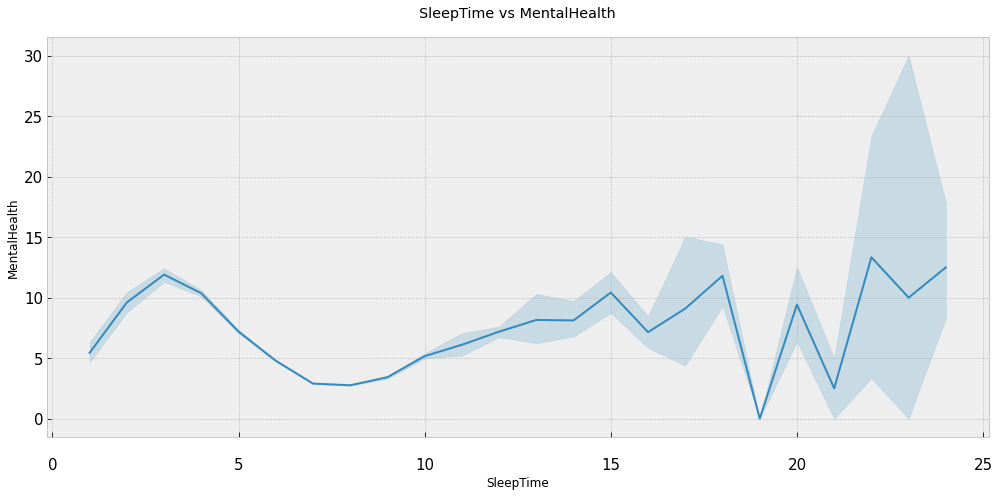

In [ ]:
plot_line('SleepTime','MentalHealth')

Number of days with bad mental health first rise with very few hours of sleep, then falls as the sleep hours are up to normal number per person, then they rise again with some fluctuations at the end.

In [ ]:
pearsonr(df['MentalHealth'], df['SleepTime'])

(-0.11971678803142112, 0.0)



All the correlations have p-value close to 0.

## **Relationships between numerical and target variable.**



### **Mann-Whitney U Test**

**H0:** Values in given numerical column are't equal between people who reported hearth disease and those who don't 

**HA:** Values in given numerical column are equal between people who reported hearth disease and those who don't 



In [ ]:
def mwu_test(col):
  '''Function performing Mann-Whitney U Test'''

  no = df.query("HeartDisease == 'No'")[col]
  yes = df.query("HeartDisease == 'Yes'")[col]
  s,p = mannwhitneyu(yes, no, alternative='two-sided')
  return p,s

In [ ]:
for col in num_cols:
  p,s = mwu_test(col)
  print(f'{col}, p-value: {p},statistics: {s}\n')

BMI, p-value: 9.008983218779159e-231,statistics: 4475945989.5

PhysicalHealth, p-value: 0.0,statistics: 4950388123.5

MentalHealth, p-value: 0.051433175597980295,statistics: 3977851921.5

SleepTime, p-value: 2.109630603324657e-05,statistics: 4062250690.5



Only with Mental Health the null hypothesis upholds, the rest of numerical columns have different for people who reported hearing disease and those who didn't

#### **Heart Disease and BMI**

In [ ]:
def heart_box(col):
  '''Function making boxlpot of given column by Heart Disease'''
  sns.boxplot(x='HeartDisease',y=col, data=df)
  plt.title(f'{col} by Heart Disease')
  plt.show()

In [ ]:
def kdeplot(col):
  '''Function making kde of given column by Heart Disease'''

  sns.kdeplot(col,data = df, hue = 'HeartDisease',fill=True)
  plt.title(f'{col} distribiution by Heart Disease')
  plt.show()

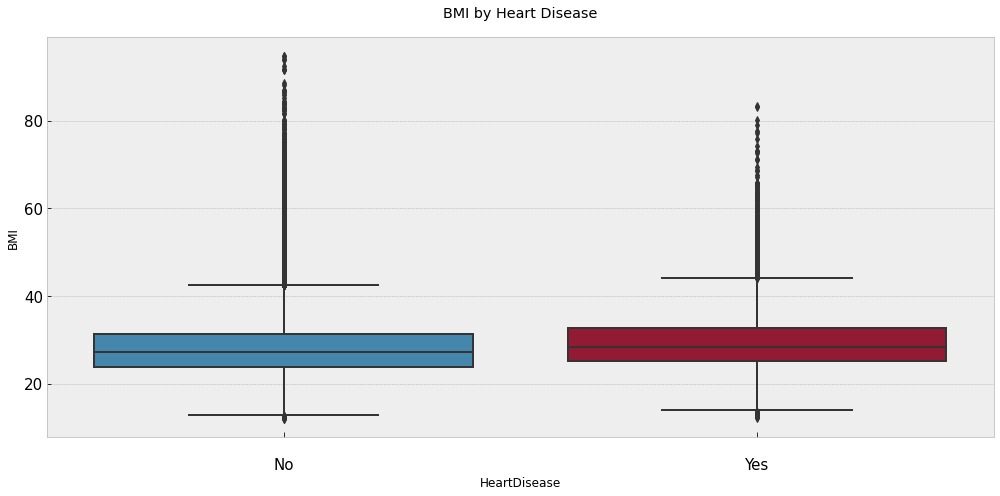

In [ ]:
heart_box('BMI')

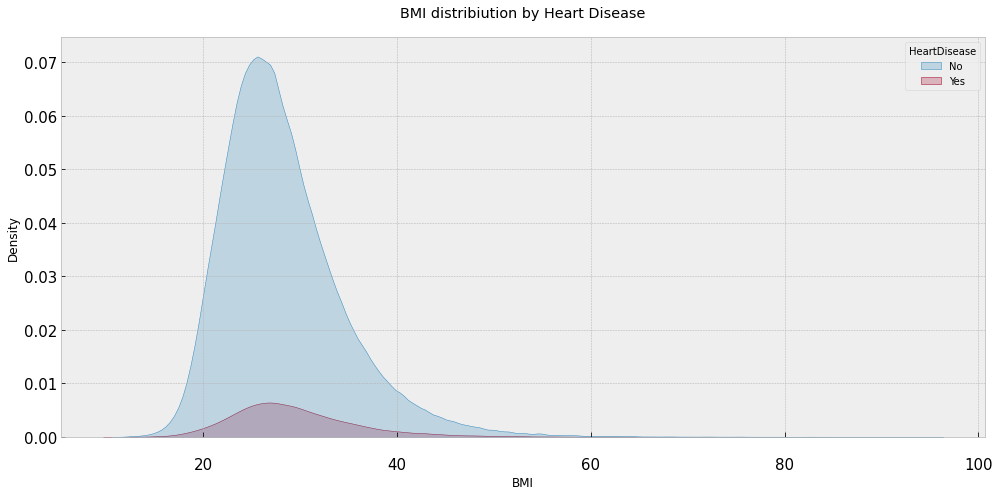

In [ ]:
kdeplot('BMI')

#### **Heart Disease and Physical Health**

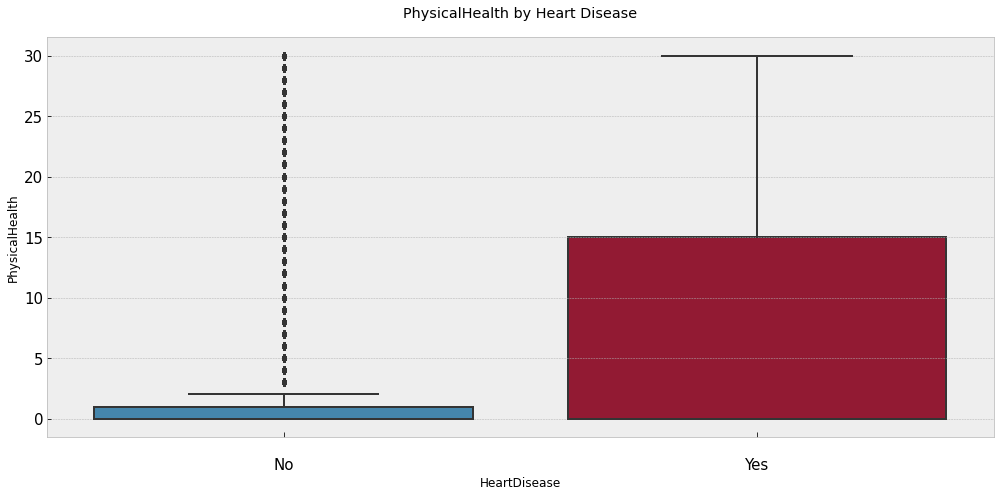

In [ ]:
heart_box('PhysicalHealth')

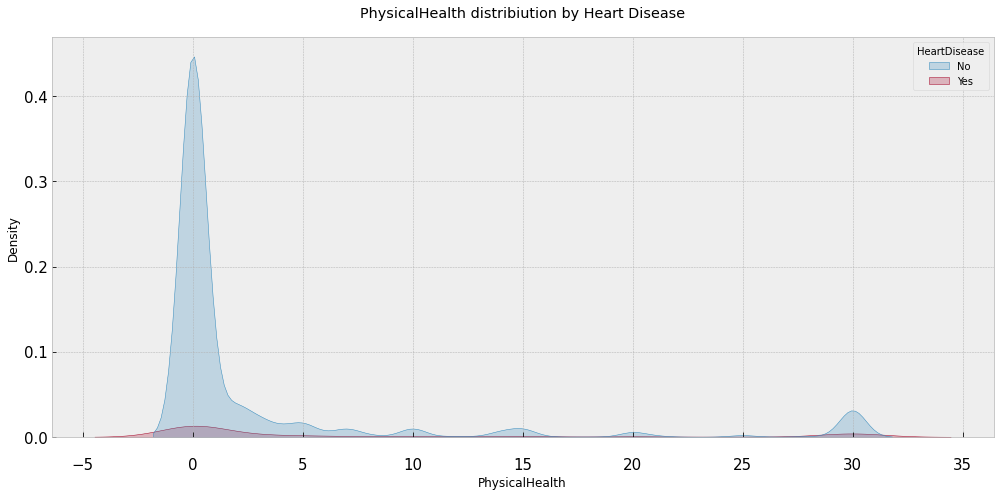

In [ ]:
kdeplot('PhysicalHealth')

#### **Heart Disease and Sleep Time**

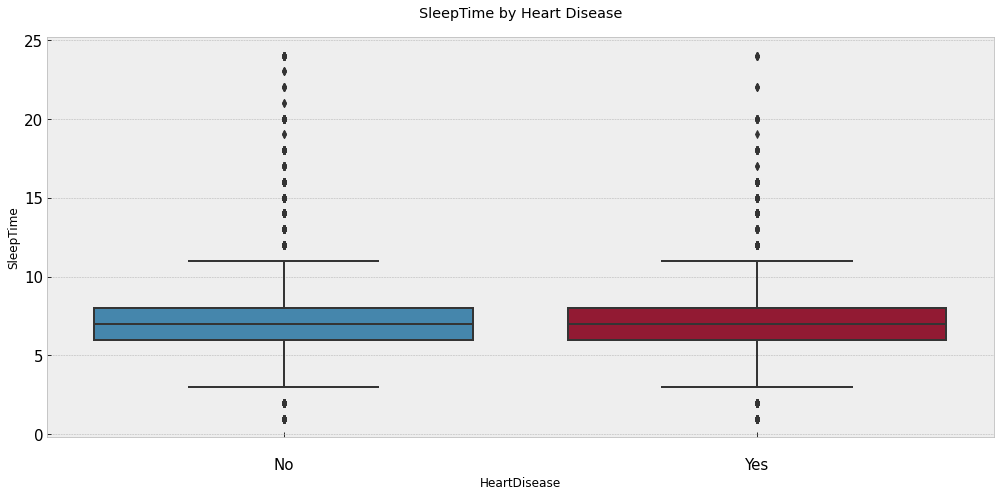

In [ ]:
heart_box('SleepTime')

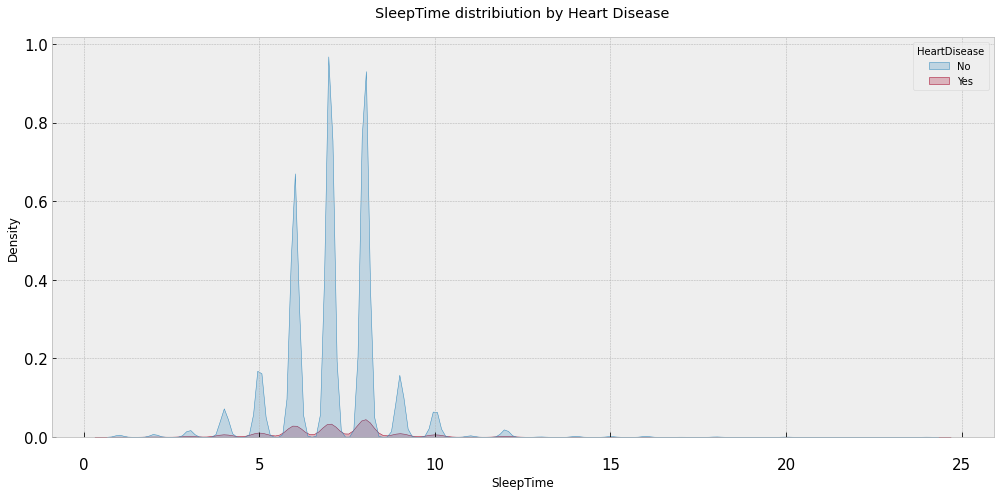

In [ ]:
kdeplot('SleepTime')

#### **Heart Disease by Physical Health and BMI**
Since Physical Health and BMI share some weak correlation and also both are statistically different in terms of Heart Disease it's a good idea to see this three values on plot togeheter

In [ ]:
def heart_line(col1,col2):
  '''Function ploting line from two columns acording to Heart Disease'''
  pbh_plot = sns.lineplot(x = col1,y = col2 ,hue = 'HeartDisease' ,data = df)
  pbh_plot.set_title(f'{col1} vs {col2} by Heart Disease ')
  plt.show()

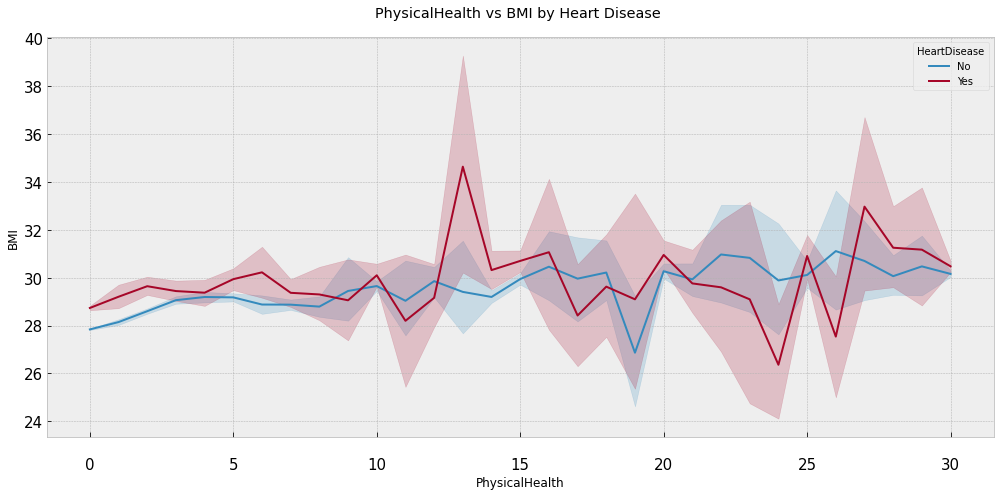

In [ ]:
heart_line('PhysicalHealth','BMI')

## **Relationship between ordinal variables**

### **Spearman Rank Correlation**
Before computing Spearman's Rho we need to first encode ordinal values.

#### **Age Category and General Health**

In [ ]:
def to_ord_enc(col):
  '''Function creating values for ordinal encoding'''
  keys = [age for age in df[col].unique()]
  keys.sort()
  vals = [i for i in range(1,len(keys)+1)]
  return dict(zip(keys,vals))

In [ ]:
age = to_ord_enc("AgeCategory")
health = {'Excellent': 5,'Very good': 4, 'Good': 3, 'Fair': 2, 'Poor': 1}
df['Age'] = df["AgeCategory"].replace(age)
df['Health'] = df["GenHealth"].replace(health)

In [ ]:
spearmanr(df['Age'],df['Health'])

SpearmanrResult(correlation=-0.18434069311063825, pvalue=0.0)

Week correlation with low p-value

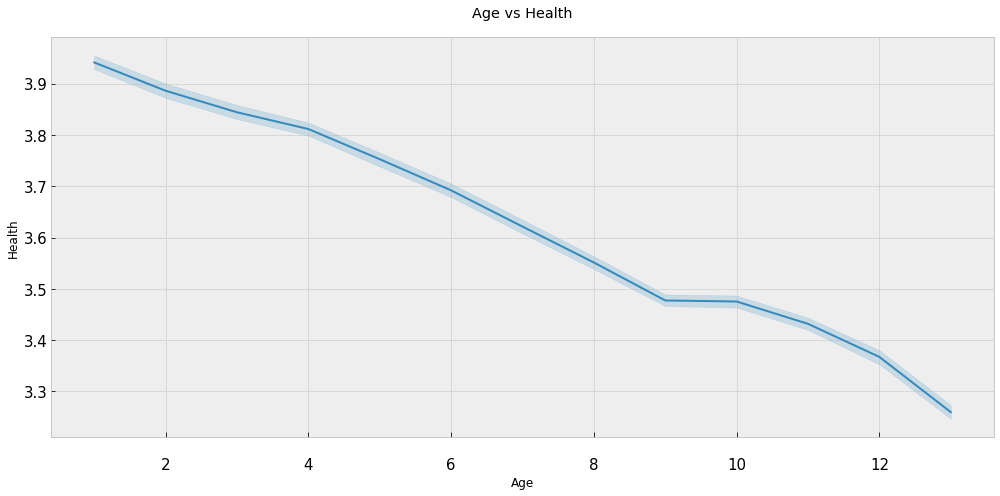

In [ ]:
plot_line('Age','Health')

## **Relationships between ordinal and target variable.**


### **Mann-Whitney U Test**

**H0:** Values in given ordinal column are't equal between people who reported hearth disease and those who don't 

**HA:** Values in given ordinal column are equal between people who reported hearth disease and those who don't 

In [ ]:
pa,sa = mwu_test('Age')
ph,sh = mwu_test('Health')

print(f"Age, p-value: {pa}, statistics: {sa}\n")
print(f"Health, p-value: {ph}, statistics: {sh}\n")

Age, p-value: 0.0, statistics: 5971907777.5

Health, p-value: 0.0, statistics: 2218660633.5



Both have diffrence in relation to Heart Disease

#### **Heart Disease and Age**

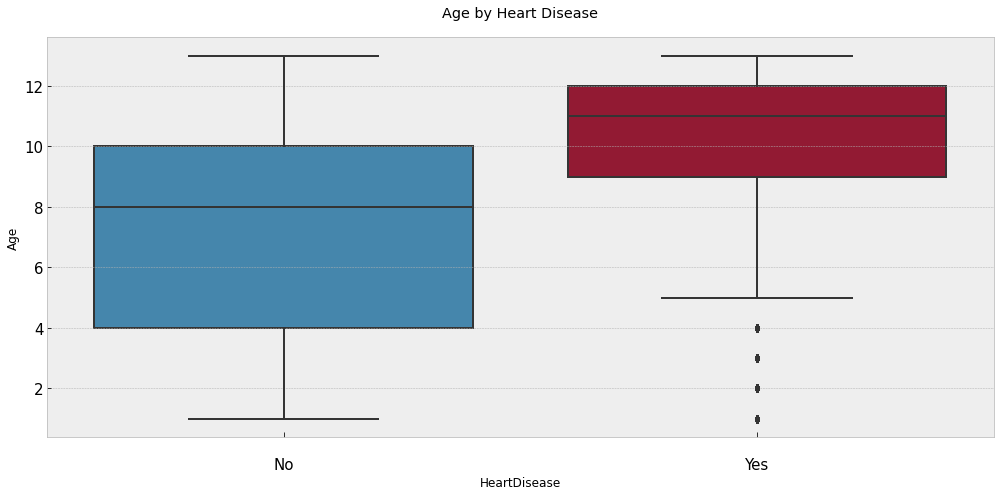

In [ ]:
heart_box('Age')

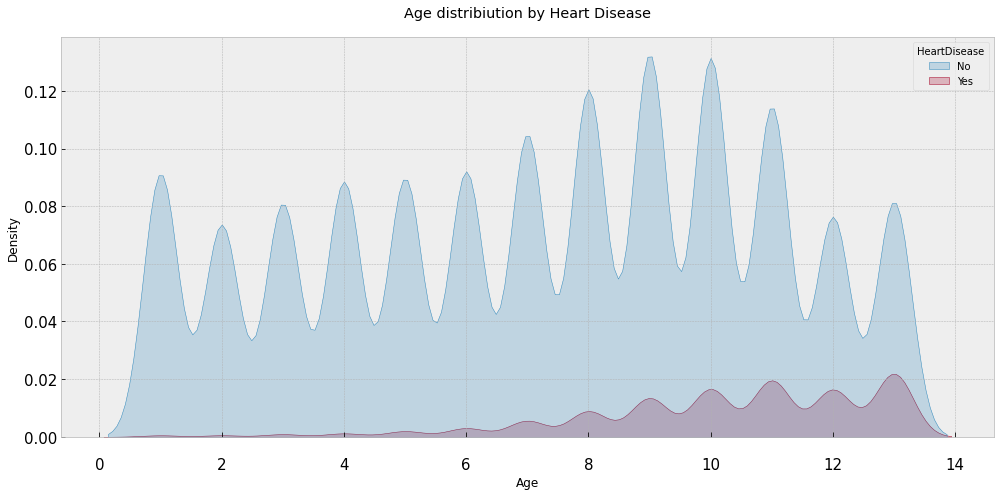

In [ ]:
kdeplot('Age')

#### **Heart Disease and Health**

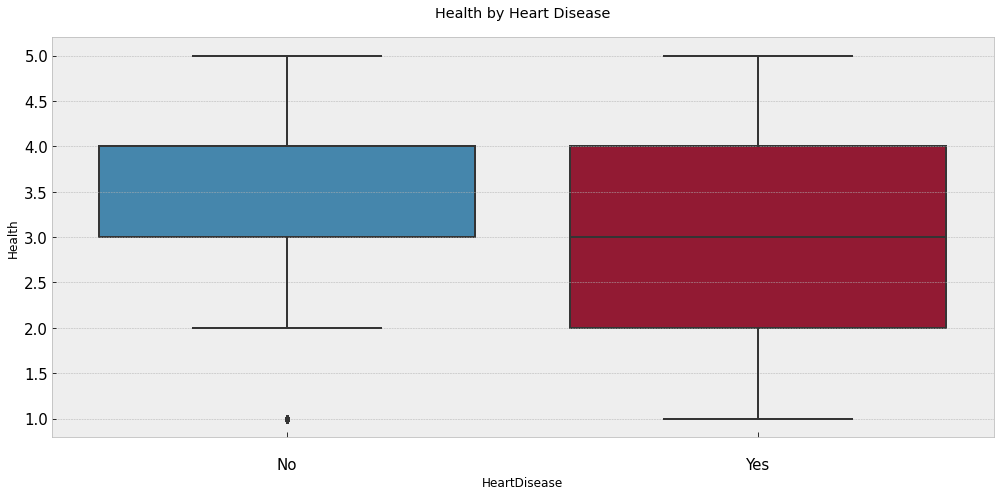

In [ ]:
heart_box('Health')

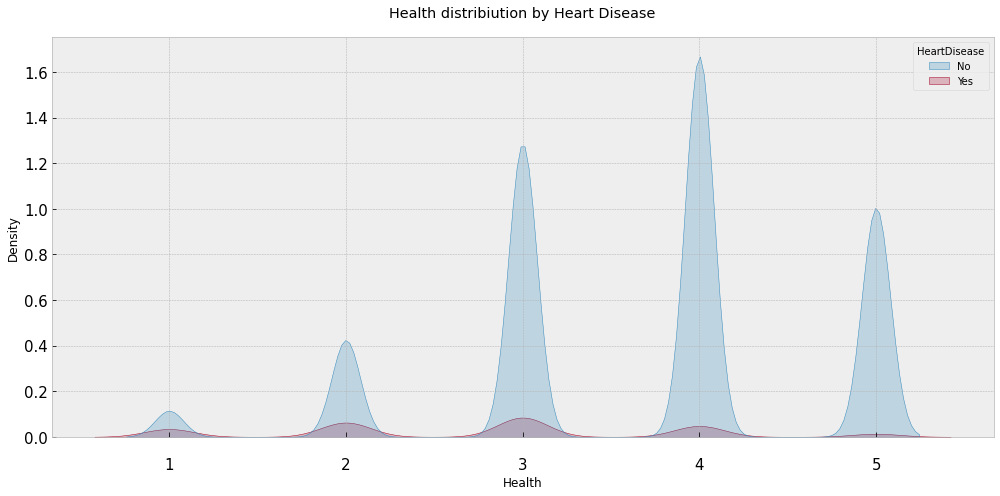

In [ ]:
kdeplot('Health')

#### **Heart Disease by Age and Health**

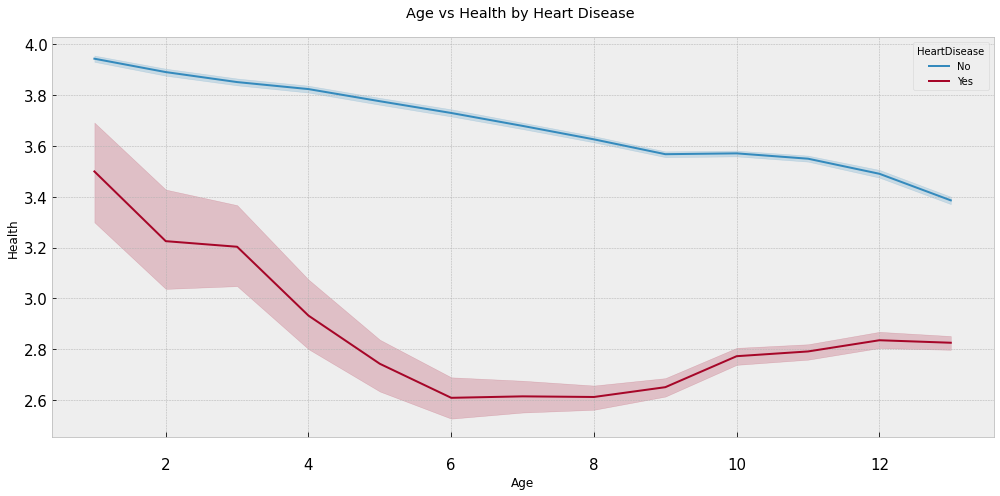

In [ ]:
heart_line('Age','Health')

## **Relationship between ordinal and numerical variables**

### **Age and numerical columns**



#### **Spearman Rank Correlation**


In [ ]:
for col in num_cols:
 cor = spearmanr(df[col],df['Age'])
 print(f'{col}, {cor}\n')

BMI, SpearmanrResult(correlation=0.006298226046883354, pvalue=0.00036846873572126245)

PhysicalHealth, SpearmanrResult(correlation=0.05738969925557703, pvalue=1.9935334256853054e-231)

MentalHealth, SpearmanrResult(correlation=-0.2319669636789177, pvalue=0.0)

SleepTime, SpearmanrResult(correlation=0.12549135667161784, pvalue=0.0)



All of the correlations are week with low p-values. The strongest are with Mental Health and Sleep Time.

#### **Age and Mental Health**

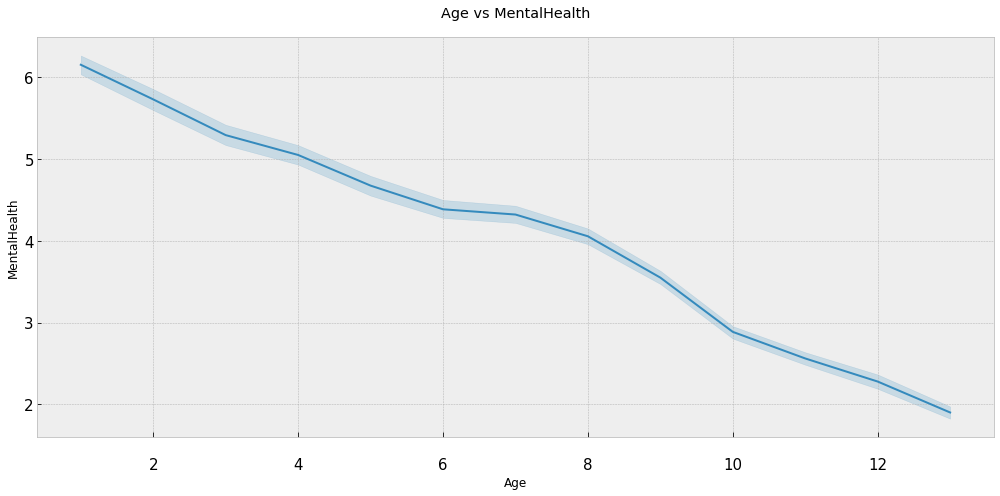

In [ ]:
plot_line('Age','MentalHealth')

Seems like Mental Health gets better with Age.

#### **Age and Sleep Time**

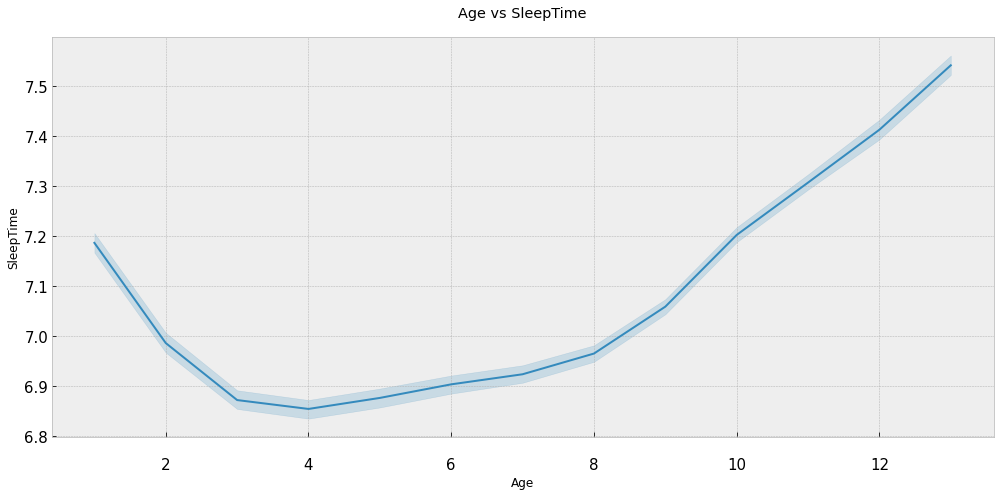

In [ ]:
plot_line('Age','SleepTime')

At first while getting older people are getting less sleep, but then the situation reverses.

#### **Heart Disease by Age and Sleep Time**

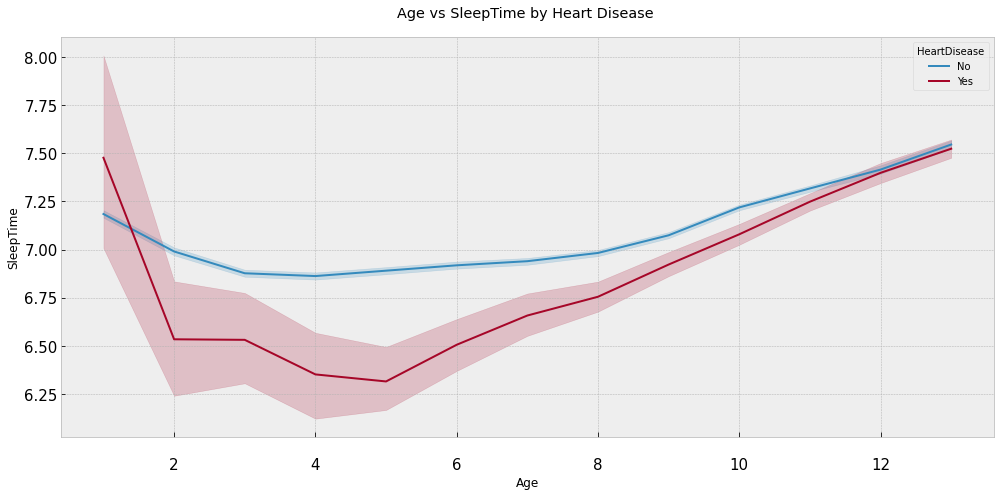

In [ ]:
heart_line('Age','SleepTime')

### **Health and numerical columns**


#### **Spearman Rank Correlation**


In [ ]:
for col in num_cols:
 cor = spearmanr(df[col],df['Health'])
 print(f'{col}, {cor}\n')

BMI, SpearmanrResult(correlation=-0.22855121797937789, pvalue=0.0)

PhysicalHealth, SpearmanrResult(correlation=-0.40792639880539083, pvalue=0.0)

MentalHealth, SpearmanrResult(correlation=-0.18229762878984712, pvalue=0.0)

SleepTime, SpearmanrResult(correlation=0.07808095633318164, pvalue=0.0)



#### **Health and Physical Health**

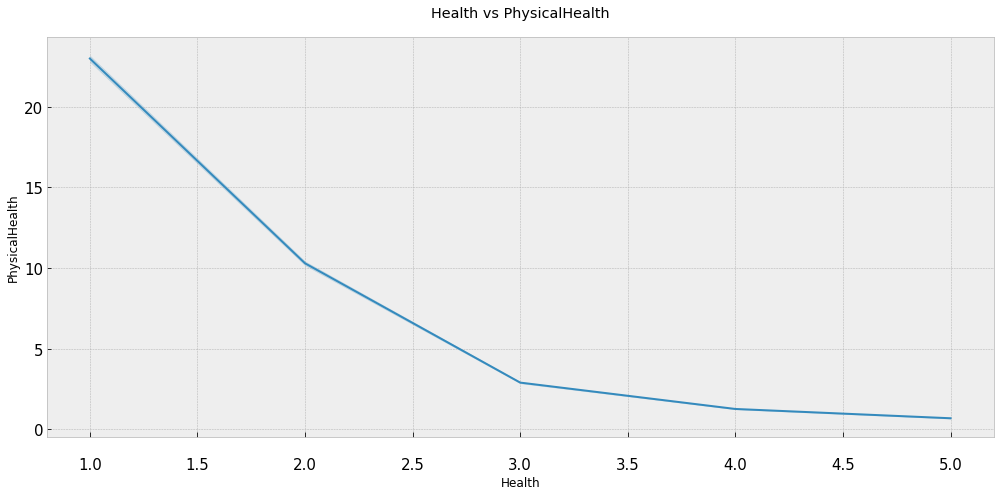

In [ ]:
plot_line('Health','PhysicalHealth')

#### **Health and BMI**

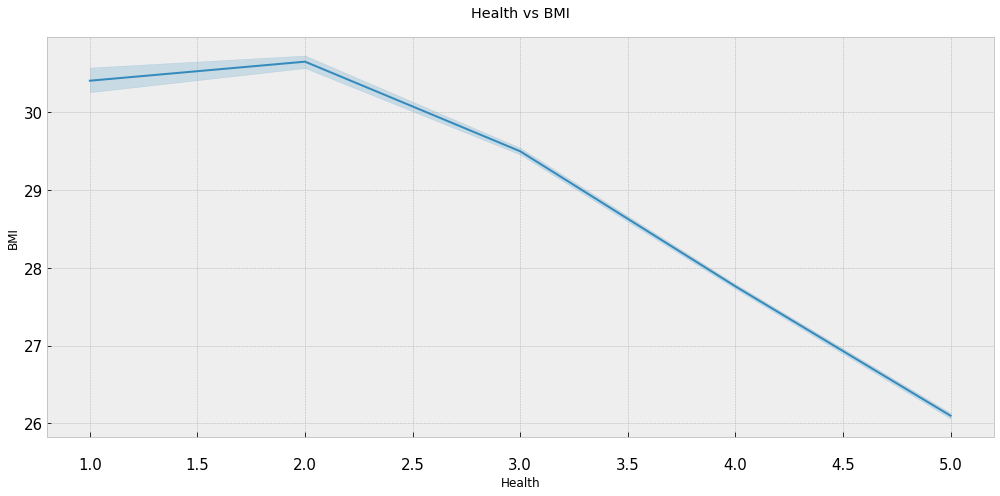

In [ ]:
plot_line('Health','BMI')

#### **Health and Mental Health**

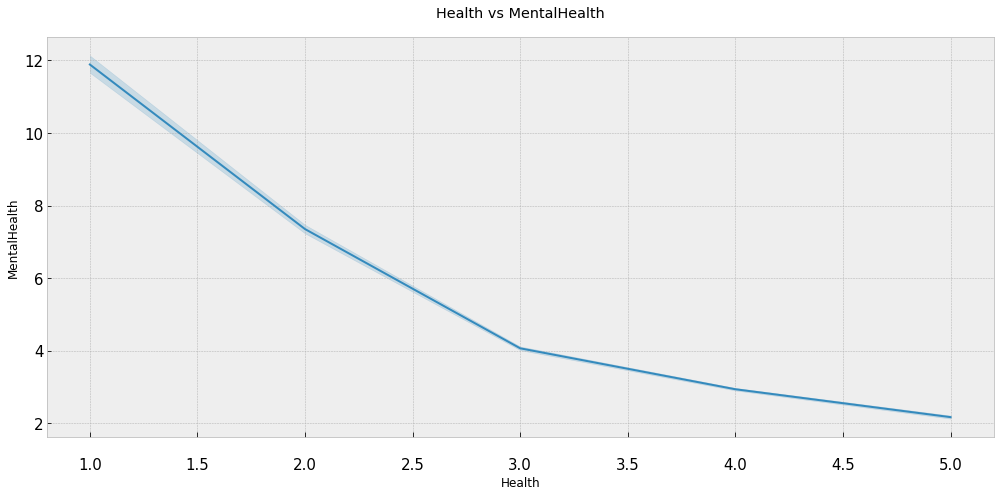

In [ ]:
plot_line('Health','MentalHealth')

#### **Heart Disease by Health and Physical Health**

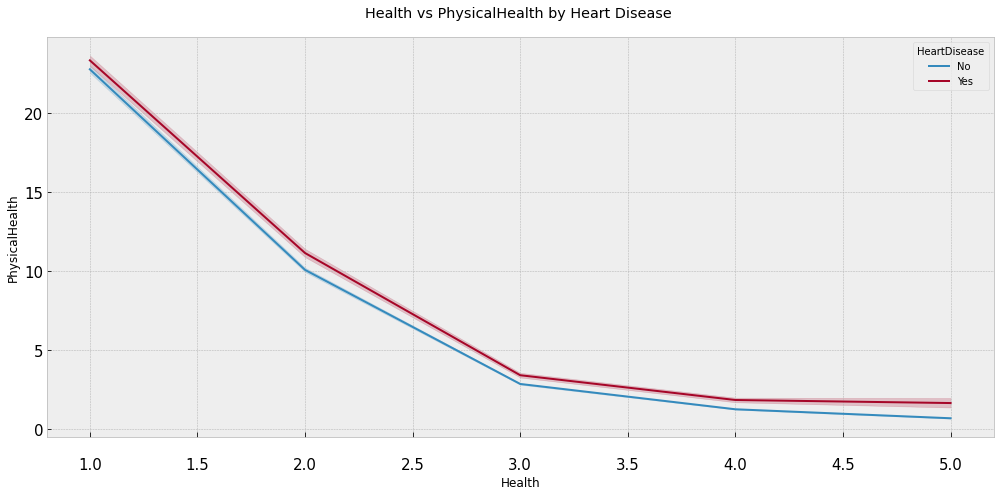

In [ ]:
heart_line('Health','PhysicalHealth')

#### **Heart Disease by Health and BMI**

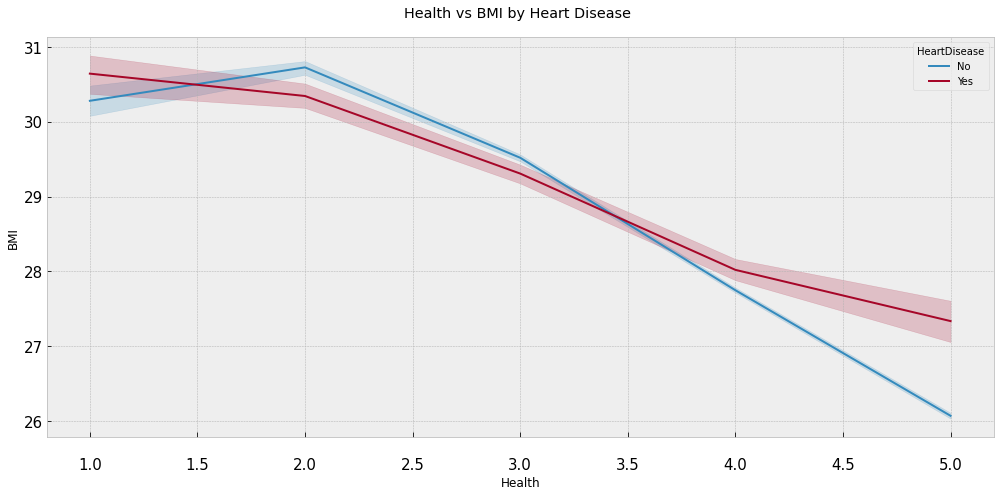

In [ ]:
heart_line('Health','BMI')

## **Relationship between categorical and target variable**

### **Chi-Square Test Of Independence**

**H0:** Heart Disease and variable in question are independent \
**H1:** Heart Disease and variable in question are dependent

In [ ]:
def chi2(obs):
  '''Function perforimg the chi2 test'''
  
  chi2, p, dof, ex = chi2_contingency(obs)
  print(f'p-value: {p}, chi2: {chi2}\nexpected:\n {ex}')

In [ ]:
def crosstabs(col):
  '''Function making contingency table with percentages margins and without thrm'''

  crosstab = pd.crosstab(index=df['HeartDisease'], columns=df[col],
                        margins=True, normalize='index')

  crosstab_wm = pd.crosstab(index=df['HeartDisease'], columns=df[col], margins=False)
  return crosstab,crosstab_wm

In [ ]:
def cross_bar(tab):
  '''Function plotting crosstab in from of bar'''

  tab.plot.bar(rot=0)
  plt.ylabel('Count')
  name = tab.iloc[0].index.name
  plt.title(f'Heart Disease by {name}')

#### **Heart Disease and Sex**

In [ ]:
observed_sex, observed_sex_wm = crosstabs('Sex')

In [ ]:
observed_sex

Sex,Female,Male
HeartDisease,,
No,0.535428,0.464572
Yes,0.410404,0.589596
All,0.524727,0.475273


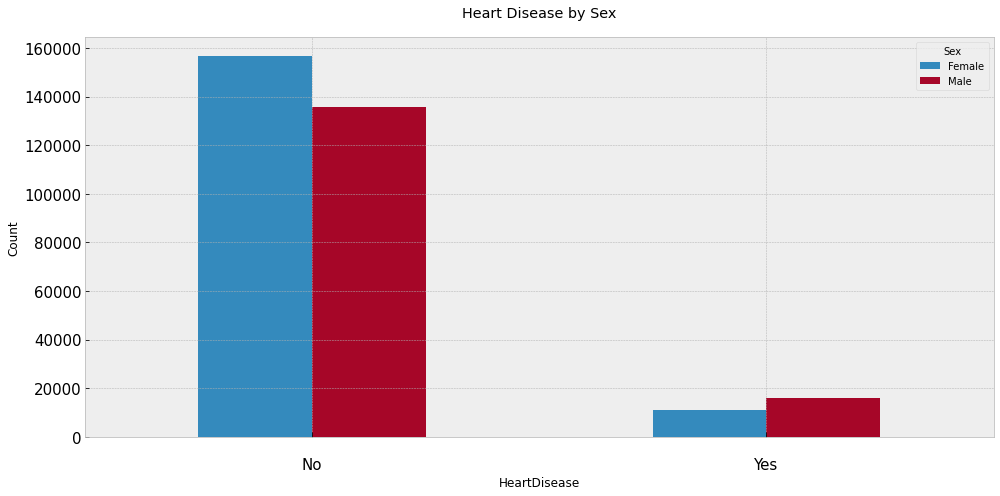

In [ ]:
cross_bar(observed_sex_wm)

In [ ]:
chi2(observed_sex_wm)

p-value: 0.0, chi2: 1568.3069168517372
expected:
 [[153441.65390328 138980.34609672]
 [ 14363.34609672  13009.65390328]]


Heart Disease and Sex are dependent. Man are more prone to Heart Disease.

#### **Heart Disease and Smoking**



In [ ]:
observed_smoke, observed_smoke_wm = crosstabs('Smoking')

In [ ]:
observed_smoke

Smoking,No,Yes
HeartDisease,,
No,0.603754,0.396246
Yes,0.414131,0.585869
All,0.587523,0.412477


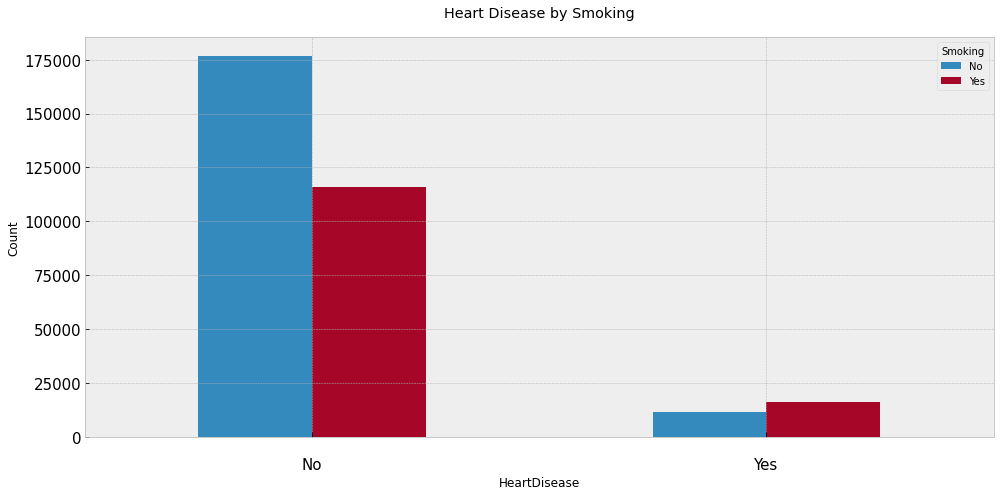

In [ ]:
cross_bar(observed_smoke_wm)

In [ ]:
chi2(observed_smoke_wm)

p-value: 0.0, chi2: 3713.0331469808216
expected:
 [[171804.72588377 120617.27411623]
 [ 16082.27411623  11290.72588377]]


These two are also dependent. Smoking is more prevelent in inviduals with Heart Disease.

#### **Heart Disease and Alcohol Drinking**

In [ ]:
observed_drink, observed_drink_wm = crosstabs('AlcoholDrinking')

In [ ]:
observed_drink

AlcoholDrinking,No,Yes
HeartDisease,,
No,0.929431,0.070569
Yes,0.958317,0.041683
All,0.931903,0.068097


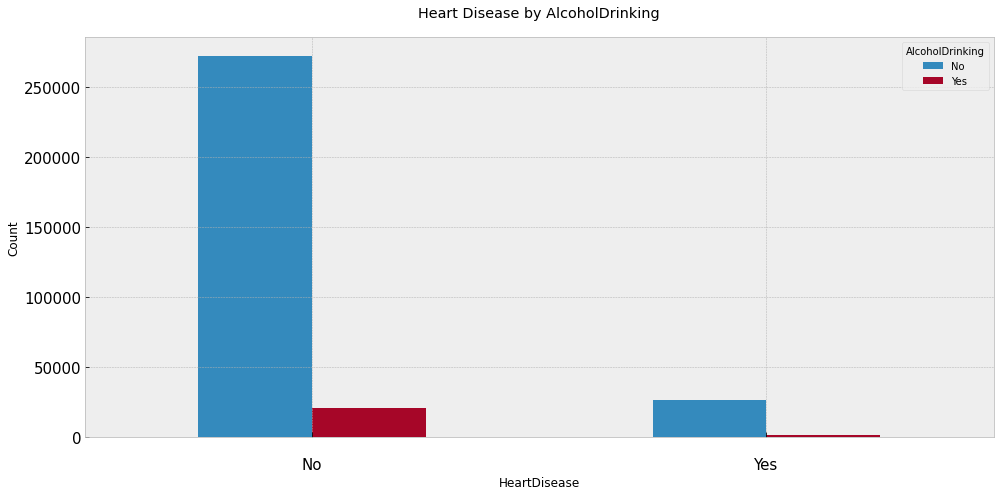

In [ ]:
cross_bar(observed_drink_wm)

In [ ]:
chi2(observed_drink_wm)

p-value: 1.892352227090306e-73, chi2: 328.64916890132054
expected:
 [[272509.01232352  19912.98767648]
 [ 25508.98767648   1864.01232352]]


With p-value this large thay are independent.

#### **Heart Disease and Race**

In [ ]:
observed_race, observed_race_wm = crosstabs('Race')

In [ ]:
observed_race

Race,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
HeartDisease,,,,,,
No,0.015936,0.026681,0.072532,0.088923,0.034341,0.761588
Yes,0.019801,0.009718,0.063164,0.052716,0.032368,0.822234
All,0.016267,0.025229,0.071730,0.085824,0.034172,0.766779


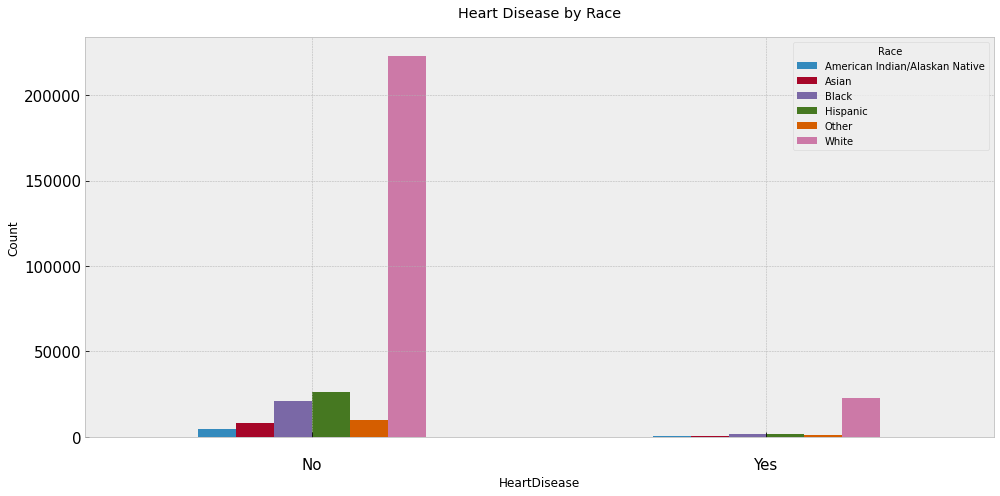

In [ ]:
cross_bar(observed_race_wm)

In [ ]:
chi2(observed_race_wm)

p-value: 2.9886131565632597e-180, chi2: 844.3148859632537
expected:
 [[  4756.73241921   7377.41583202  20975.52575244  25096.74701606
    9992.61281759 224222.9661627 ]
 [   445.26758079    690.58416798   1963.47424756   2349.25298394
     935.38718241  20989.0338373 ]]


And again we have independance.

#### **Heart Disease and Stroke**

In [ ]:
observed_stroke, observed_stroke_wm = crosstabs('Stroke')

In [ ]:
observed_stroke

Stroke,No,Yes
HeartDisease,,
No,0.973737,0.026263
Yes,0.839660,0.160340
All,0.962260,0.037740


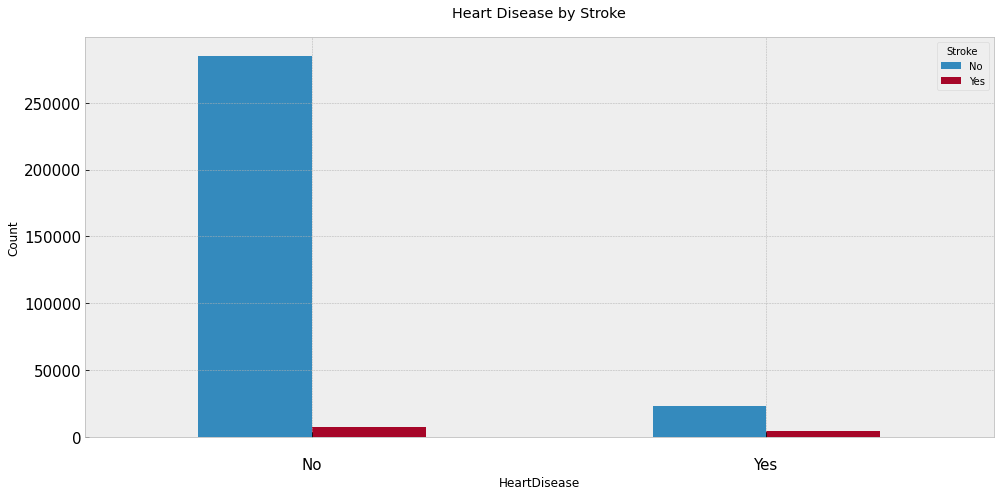

In [ ]:
cross_bar(observed_stroke_wm)

In [ ]:
chi2(observed_stroke_wm)

p-value: 0.0, chi2: 12386.4888802668
expected:
 [[281386.05160181  11035.94839819]
 [ 26339.94839819   1033.05160181]]


There's dependance between Stroke and Heart Disease.

#### **Heart Disease and Difficulty Walking**

In [ ]:
observed_df, observed_df_wm = crosstabs('DiffWalking')

In [ ]:
observed_df

DiffWalking,No,Yes
HeartDisease,,
No,0.882423,0.117577
Yes,0.633654,0.366346
All,0.861130,0.138870


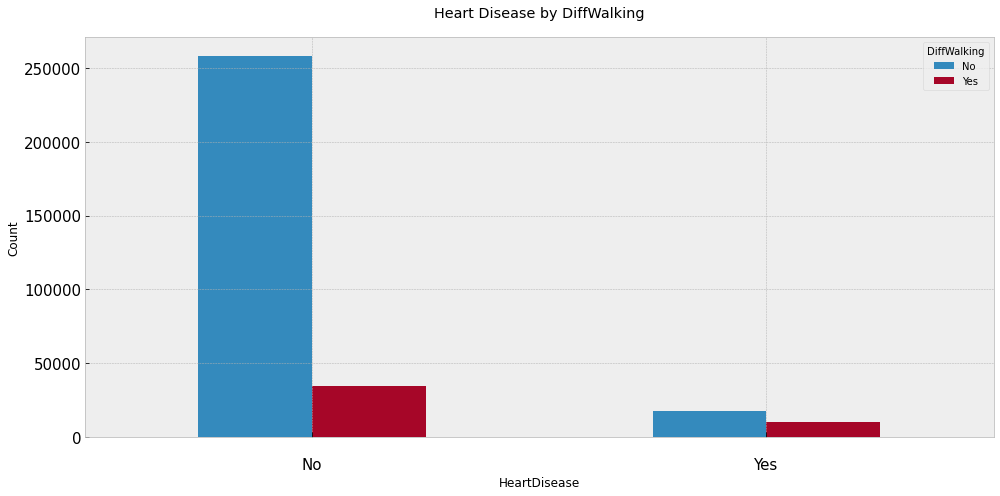

In [ ]:
cross_bar(observed_df_wm)

In [ ]:
chi2(observed_df_wm)

p-value: 0.0, chi2: 12951.153005437296
expected:
 [[251813.29436045  40608.70563955]
 [ 23571.70563955   3801.29436045]]


They are dependant. Difficulty Walking is more common in people who reported Heart Disease.

#### **Heart Disease and Diabetic**

In [ ]:
observed_dia, observed_dia_wm = crosstabs('Diabetic') 

In [ ]:
observed_dia

Diabetic,No,"No, borderline diabetes",Yes,Yes (during pregnancy)
HeartDisease,,,,
No,0.862227,0.020491,0.108901,0.008382
Yes,0.640010,0.028824,0.327220,0.003945
All,0.843206,0.021204,0.127588,0.008002


Let's see the table without percentage.

In [ ]:
observed_dia_wm

Diabetic,No,"No, borderline diabetes",Yes,Yes (during pregnancy)
HeartDisease,,,,
No,252134,5992,31845,2451
Yes,17519,789,8957,108


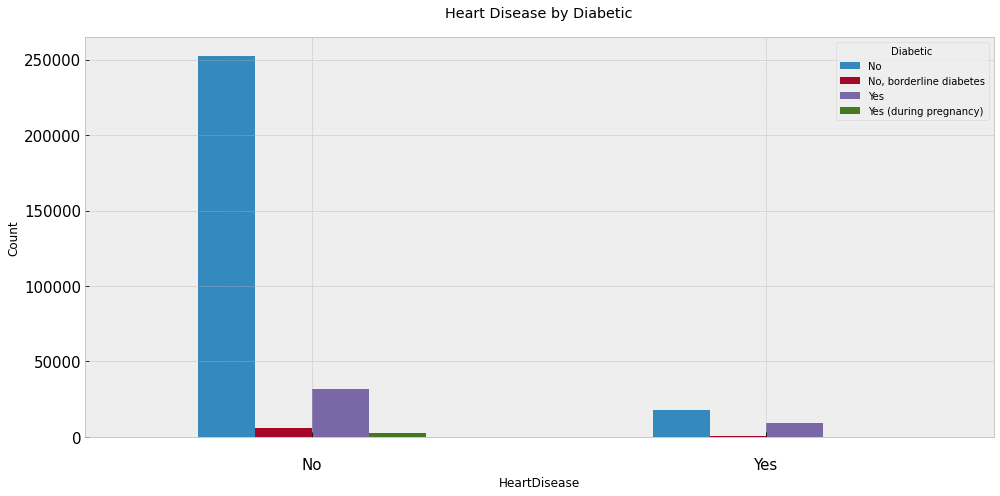

In [ ]:
cross_bar(observed_dia_wm)

In [ ]:
chi2(observed_dia_wm)

p-value: 0.0, chi2: 10959.86127652373
expected:
 [[2.46571928e+05 6.20057719e+03 3.73095341e+04 2.33996122e+03]
 [2.30810725e+04 5.80422811e+02 3.49246594e+03 2.19038781e+02]]


Despite rareness of categories, the chi-square assumptions are still met,and with p this small they are dependant. Diabietes are related to Heart Disease.

#### **Heart Disease and Physical Activity**

In [ ]:
observed_pa, observed_pa_wm = crosstabs('PhysicalActivity') 

In [ ]:
observed_pa

PhysicalActivity,No,Yes
HeartDisease,,
No,0.211865,0.788135
Yes,0.361086,0.638914
All,0.224638,0.775362


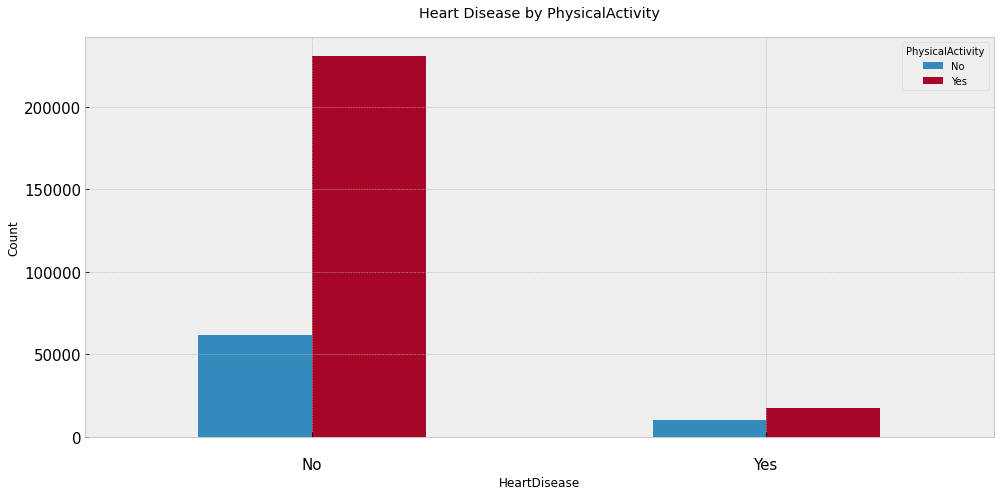

In [ ]:
cross_bar(observed_pa_wm)

In [ ]:
chi2(observed_pa_wm)

p-value: 0.0, chi2: 3199.008157559494
expected:
 [[ 65688.99337388 226733.00662612]
 [  6149.00662612  21223.99337388]]


They are dependant. Physical activity is less prevalent in people with heart conditions.

#### **Heart Disease and Asthma**

In [ ]:
observed_asthma, observed_asthma_wm = crosstabs('Asthma') 

In [ ]:
observed_asthma

Asthma,No,Yes
HeartDisease,,
No,0.870259,0.129741
Yes,0.819786,0.180214
All,0.865939,0.134061


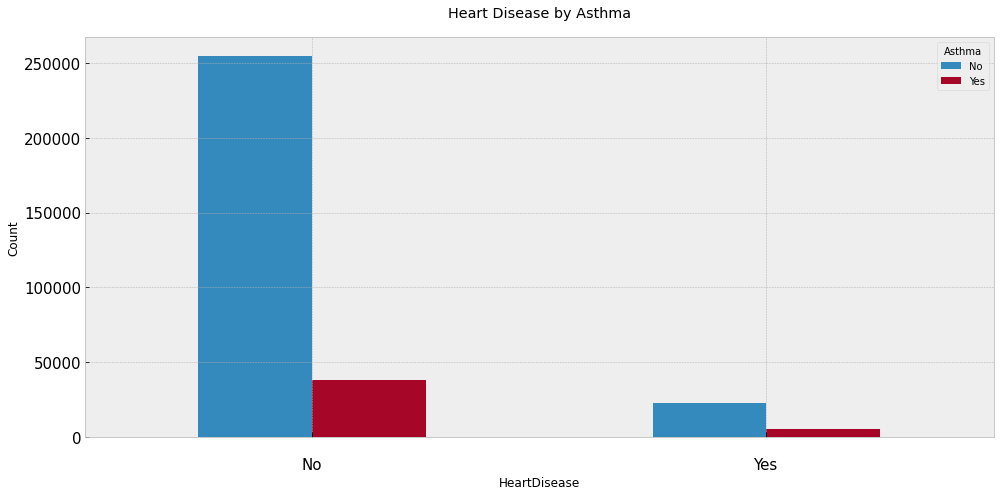

In [ ]:
cross_bar(observed_asthma_wm )

In [ ]:
chi2(observed_asthma_wm)

p-value: 2.2386144306283177e-121, chi2: 548.8508413264418
expected:
 [[253219.6485436  39202.3514564]
 [ 23703.3514564   3669.6485436]]


These two are dependant.

#### **Heart Disease and Kidney Diseasey**

In [ ]:
observed_kd, observed_kd_wm = crosstabs('KidneyDisease') 

In [ ]:
observed_kd

KidneyDisease,No,Yes
HeartDisease,,
No,0.971534,0.028466
Yes,0.873781,0.126219
All,0.963167,0.036833


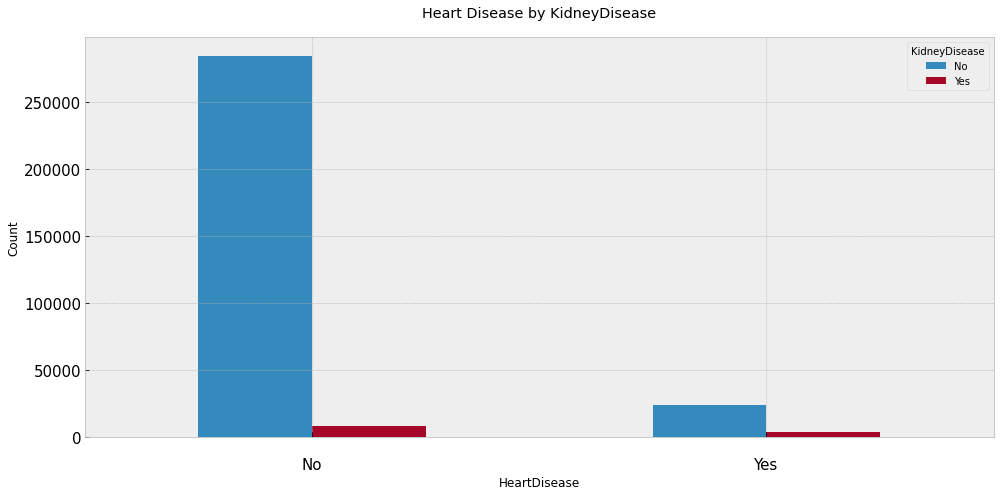

In [ ]:
cross_bar(observed_kd_wm )

In [ ]:
chi2(observed_kd_wm)

p-value: 0.0, chi2: 6739.226167871357
expected:
 [[281651.22891853  10770.77108147]
 [ 26364.77108147   1008.22891853]]


Dependant. Kindey problems are more common in pople with heart problems.

#### **Heart Disease and Skin Cancer**

In [ ]:
observed_sk, observed_sk_wm = crosstabs('SkinCancer') 

In [ ]:
observed_sk

SkinCancer,No,Yes
HeartDisease,,
No,0.915058,0.084942
Yes,0.818069,0.181931
All,0.906756,0.093244


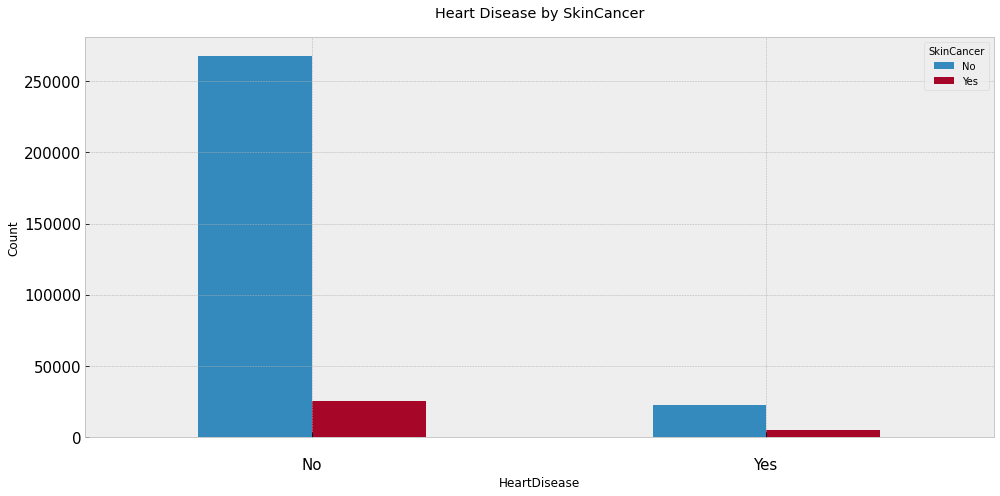

In [ ]:
cross_bar(observed_sk_wm )

In [ ]:
chi2(observed_sk_wm )

p-value: 0.0, chi2: 2783.640539757866
expected:
 [[265155.37100955  27266.62899045]
 [ 24820.62899045   2552.37100955]]


Yet again we reject the null hypotesis.
Skin cancer is more frequent in 'Yes' group. \
Out of all categorical variables only Race and AlcoholDrinking are independant to HeartDisease.

## **Findings**
While only one numerical variable with no difference in relation to HeartDisease is MentalHealth, in nominal variables Race and AlcoholDrinking are independant to HeartDisease.\
Perhaps it would be a good idea to also calculate Cramer's V across the nominal variables to futher explore reletionships between them.